# Python для визуализации данных

*Рогович Татьяна, ВШЭ*

## Упраженения

Первые три задания работаем с набором данных, который содержит всех новорожденных и их имена в CША. Последние два задания делаем на уже известном вам датасете про индийских женщин и диабет.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

babies = pd.read_csv('https://moredata.pythonhelp.ru/babies/babies.csv')
pima = pd.read_csv('https://moredata.pythonhelp.ru/diabetes/diabetes.csv')

In [10]:
babies.tail()

,Unnamed: 0,name,sex,number,year
1690779,33833,Zymaire,M,5,2010
1690780,33834,Zyonne,M,5,2010
1690781,33835,Zyquarius,M,5,2010
1690782,33836,Zyran,M,5,2010
1690783,33837,Zzyzx,M,5,2010


In [11]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет


In [12]:
min_y = babies['year'].min()
max_y = babies['year'].max()
print(f'{min_y}-{max_y} г.г.')

1880-2010 г.г.


2) Какое имя в датасете находится по индексом 121?

In [13]:
babies.name[121]

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [14]:
babies[babies['name'] == 'Aaron']['number'].sum()

527668

4) Насколько больше за все время родилось мальчиков чем девочек?

In [15]:
boys = babies[babies['sex'] == 'M']['number'].sum()
girls = babies[babies['sex'] == 'F']['number'].sum()
print(f'мальчиков родилось на {boys-girls} больше, чем девочек')

мальчиков родилось на 2422447 больше, чем девочек


5) Cколько мальчиков родилось в 2010?

In [16]:
in_2010 = babies[(babies['year'] == 2010)
      &(babies['sex'] == 'M')]['number'].sum()
print(f'в 2010 году родилось {in_2010} мальчиков')

в 2010 году родилось 1898382 мальчиков


6) Сколько в датасете девочек по имени John?

In [17]:
girl_John = babies[(babies.name == 'John')
      &(babies.sex == 'F')]['number'].sum()
print(f'девочек по имени John {girl_John}')

девочек по имени John 21578


## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


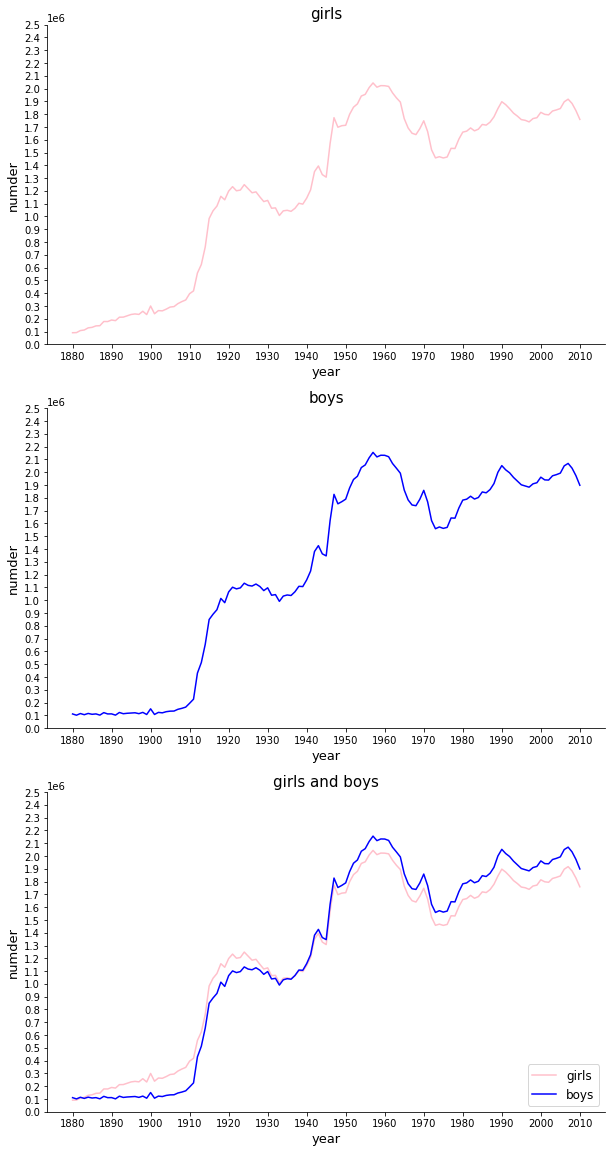

In [23]:
import pandasql
query = """
    SELECT year, sum(number) as total_girl
    FROM babies
    WHERE sex = 'F'
    GROUP BY year
    """
babies_girl = pandasql.sqldf(query, locals())
query = """
    SELECT year, sum(number) as total_boy
    FROM babies
    WHERE sex = 'M'
    GROUP BY year
    """
babies_boy = pandasql.sqldf(query, locals())
import matplotlib.ticker as ticker
fig, ax = plt.subplots(3, figsize = (10,20))
for x in range(3):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('year', fontsize = 13)
    ax[x].set_ylabel('numder', fontsize = 13)
    ax[x].set_ylim(0,2500000)
    ax[x].xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax[x].yaxis.set_major_locator(ticker.MultipleLocator(100000))
ax[0].plot(babies_girl.year, babies_girl.total_girl, color = 'pink')
ax[0].set_title('girls', fontsize = 15)

ax[1].plot(babies_boy.year, babies_boy.total_boy, color = 'blue')
ax[1].set_title('boys', fontsize = 15)

ax[2].plot(babies_girl.year, babies_girl.total_girl, label = 'girls', color = 'pink')
ax[2].plot(babies_boy.year, babies_boy.total_boy, label = 'boys', color = 'blue')
ax[2].set_title('girls and boys', fontsize = 15)
ax[2].legend(loc = 4, fontsize = 12)
ax[2].xaxis.set_tick_params()




До 1911 года рождаемость была низкая, после 1911 года произошел резкий скачок роста рождаемости,
мальчики и девочки рождались в одинаковых колличествах до 1915 года.
С 1922 года по 1940 год наблюдалось небольшое снижение рождаемости детей, после чего произошел рост,
при чем мальчиков рожалось немного больше девочек. Пик рожаемости был в 1958-1959 г.г.

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



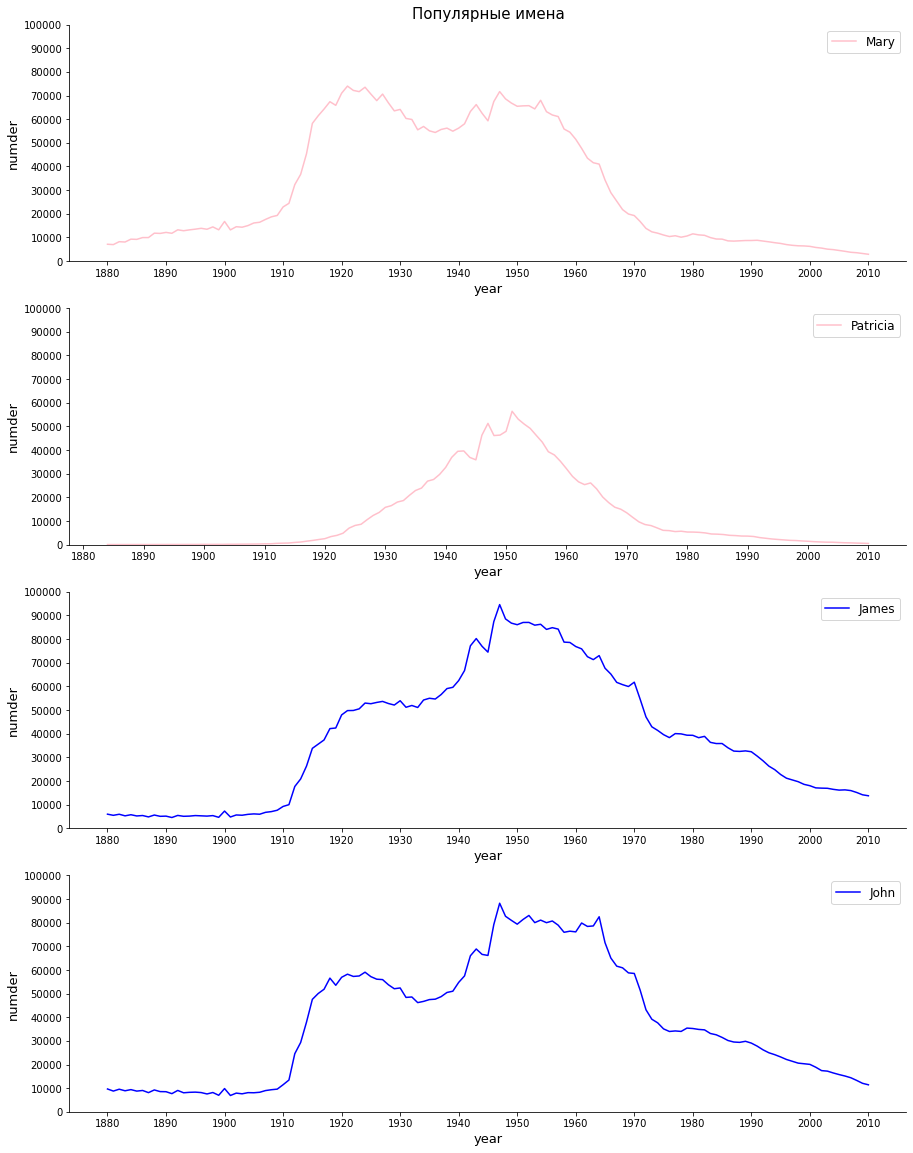

In [25]:
query = """
    SELECT name, sum(number) as count
    FROM babies
    WHERE sex = 'F'
    GROUP BY name 
    ORDER BY count desc
    """
pandasql.sqldf(query, locals())
query = """
    SELECT name, sum(number) as count
    FROM babies
    WHERE sex = 'M'
    GROUP BY name
    ORDER BY count desc
    """
pandasql.sqldf(query, locals())

babies_Mary = babies[(babies['name'] == 'Mary')
      &(babies['sex'] == 'F')]
babies_Patricia = babies[(babies['name'] == 'Patricia')
      &(babies['sex'] == 'F')]
babies_James = babies[(babies['name'] == 'James')
      &(babies['sex'] == 'M')]
babies_John = babies[(babies['name'] == 'John')
      &(babies['sex'] == 'M')]
fig, ax = plt.subplots(4, figsize = (15,20))
for x in range(4):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('year', fontsize = 13)
    ax[x].set_ylabel('numder', fontsize = 13)
    ax[x].set_ylim(0,100000)
    ax[x].xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax[x].yaxis.set_major_locator(ticker.MultipleLocator(10000))
ax[0].set_title('Популярные имена', fontsize = 15)
ax[0].plot(babies_Mary.year, babies_Mary.number, label = 'Mary', color = 'pink')
ax[0].legend(loc = 1, fontsize = 12)
ax[1].plot(babies_Patricia.year, babies_Patricia.number, label = 'Patricia', color = 'pink')
ax[1].legend(loc = 1, fontsize = 12)
ax[2].plot(babies_James.year, babies_James.number, label = 'James', color = 'blue')
ax[2].legend(loc = 1, fontsize = 12)
ax[3].plot(babies_John.year, babies_John.number,label = 'John', color = 'blue')
ax[3].legend(loc = 1, fontsize = 12)

Имя Mary начало набирать популярность с 1910 г и было популярно до 1960, после чего популяность пошла на спад.
До 1920 г имя Patricia было совсем не популярно, после популярность начала расти и достигла пика в 1952 году, после чего началось падение.
Имя James и John были всегда популярны, но  пик популярности пришелся на период  1949-1955 гг

## Задание 4

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

Text(1.0, 1.0, '1885 год')

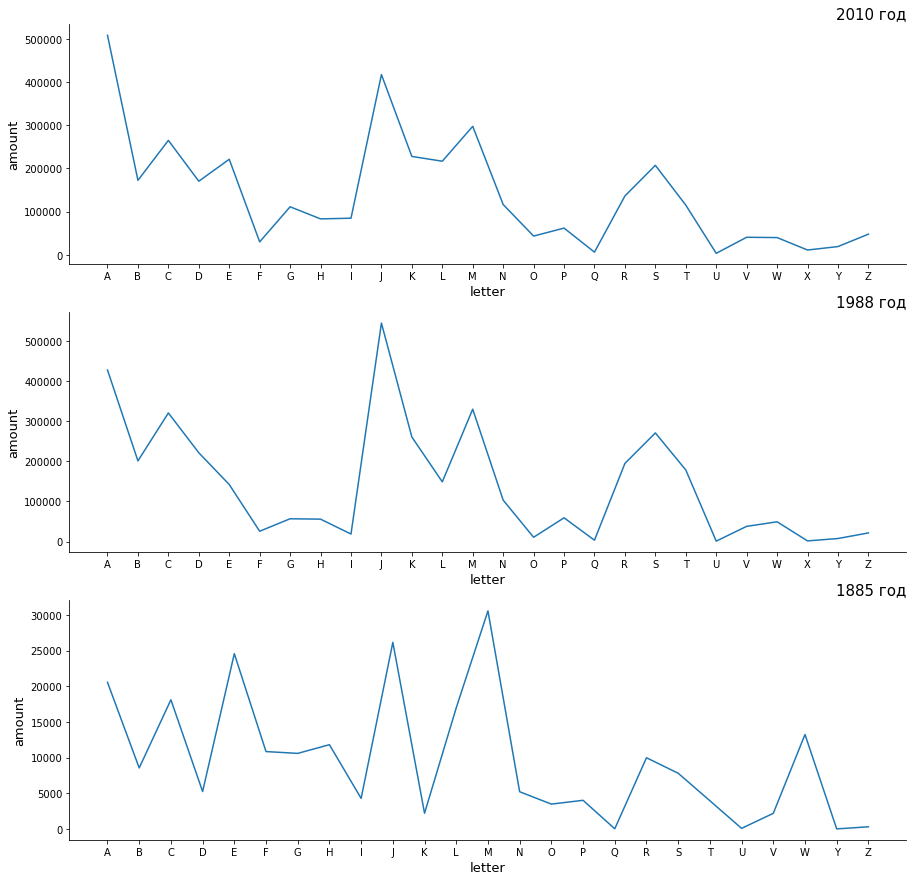

In [29]:
b = []
for i in babies['name']:
    b.append(i[0])
babies['f_latter'] = b
babies[babies['year'] == 2010]

query = """
    SELECT f_latter, sum(number) as k_name
    FROM babies
    WHERE year = 2010
    GROUP BY f_latter
    """
f_2010 = pandasql.sqldf(query, locals())
query1 = """
    SELECT f_latter, sum(number)  as k_name
    FROM babies
    WHERE year = 1988
    GROUP BY f_latter
    """
f_1988 = pandasql.sqldf(query1, locals())

query2 = """
    SELECT f_latter, sum(number)  as k_name
    FROM babies
    WHERE year = 1885
    GROUP BY f_latter
    """
f_1885 = pandasql.sqldf(query2, locals())

fig, ax = plt.subplots(3, figsize = (15,15))
for x in range(3):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('letter', fontsize = 13)
    ax[x].set_ylabel('amount', fontsize = 13)
ax[0].plot(f_2010.f_latter, f_2010.k_name)
ax[0].set_title('2010 год', loc = 'right', fontsize = 15)
ax[1].plot(f_1988.f_latter, f_1988.k_name)
ax[1].set_title('1988 год', loc = 'right', fontsize = 15)
ax[2].plot(f_1885.f_latter, f_1885.k_name)
ax[2].set_title('1885 год', loc = 'right', fontsize = 15)

Text(1.0, 1.0, '1885 год')

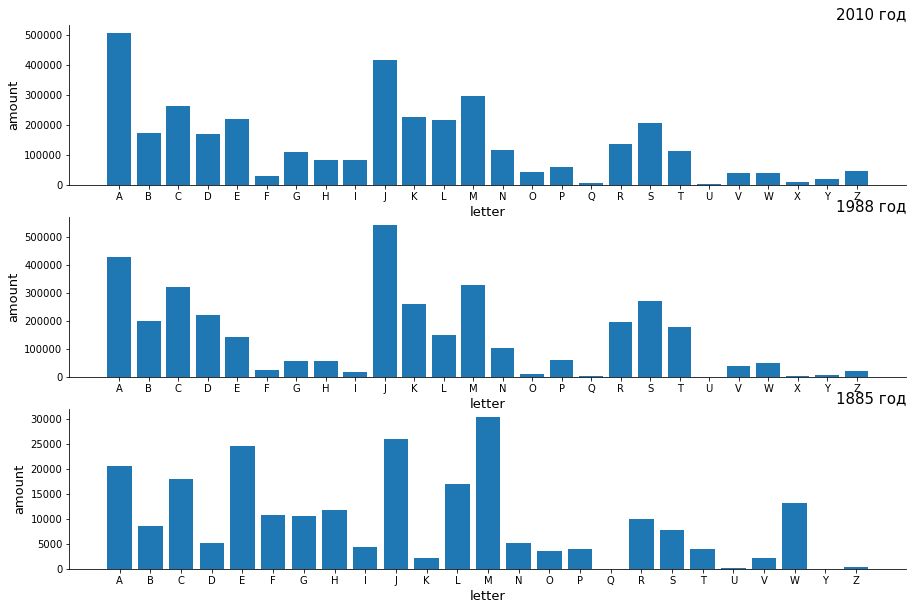

In [31]:
fig, ax = plt.subplots(3, figsize = (15,10))
for x in range(3):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('letter', fontsize = 13)
    ax[x].set_ylabel('amount', fontsize = 13)
ax[0].bar(f_2010.f_latter, f_2010.k_name)
ax[0].set_title('2010 год', loc = 'right', fontsize = 15)
ax[1].bar(f_1988.f_latter, f_1988.k_name)
ax[1].set_title('1988 год', loc = 'right', fontsize = 15)
ax[2].bar(f_1885.f_latter, f_1885.k_name)
ax[2].set_title('1885 год', loc = 'right', fontsize = 15)

В 1885 году самыми популярными именами были имена на буквы E, J, M 
В 1988 году самыми популярными именами были имена на букву J
В 2010 году самыми популярными именами были имена на букву A
Самыми не популярными именами за все три года являются имена на буквы Q и U
Имена на букву A остаются популярными в течении этих трех годов.

## Задание 4

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


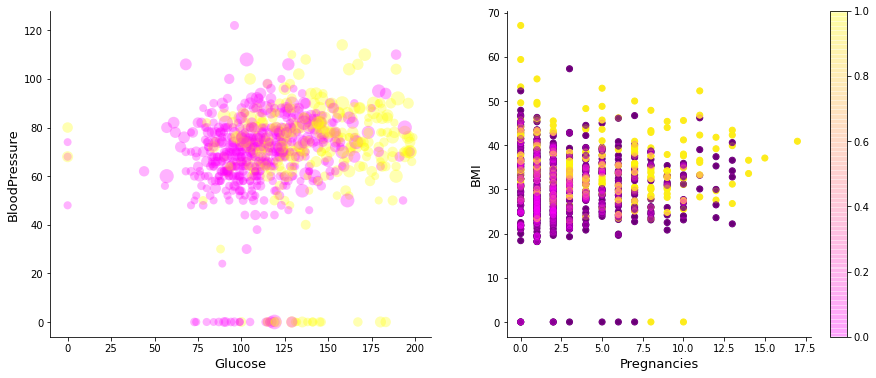

In [32]:
fig,ax = plt.subplots(1,2 ,figsize = (15,6))
for x in range(2):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    

ax[0].scatter(pima.Glucose, pima.BloodPressure,
              s = pima.Age*3 , alpha = 0.3,
              c = pima.Outcome,
              cmap = 'spring', linewidth=0)
ax[0].set_xlabel('Glucose', fontsize = 13)
ax[0].set_ylabel('BloodPressure', fontsize = 13)

ax[1].scatter(pima.Pregnancies, pima.BMI,
             c = pima.Outcome*10)
ax[1].set_xlabel('Pregnancies', fontsize = 13)
ax[1].set_ylabel('BMI', fontsize = 13)
color_graph = ax[1].scatter(pima.Pregnancies, pima.BMI ,
                         c=pima.Outcome,
                         cmap='spring',  alpha = 0.2)
plt.colorbar(color_graph)                                  

Наличие сахарного диабета зависит от уровеня глюкозы, чаще болеют те, у кого глюкоза больше 125, и у кого повышенное давление. Риск заболеть сахарным диабетом выше у женщин, которые были беременны  более пяти раз и  у кого BMI более 25.

## Дополнительное задание

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одни объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

Text(0.5, 1.0, 'Зависимость уровня глюкозы и BNI от колличества беременностей')

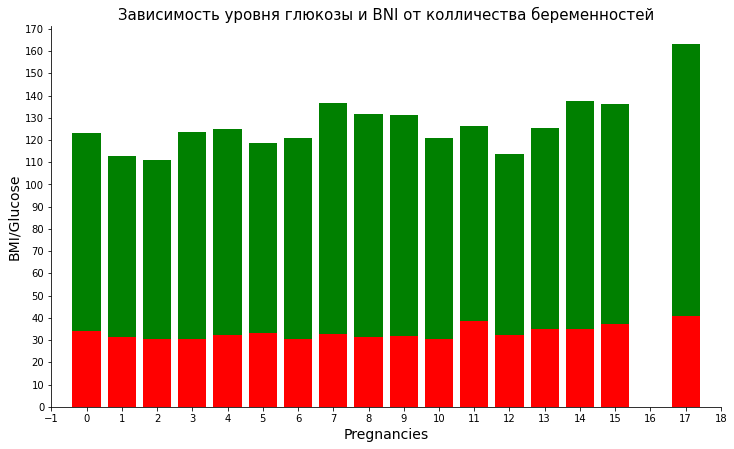

In [33]:
query = """
    SELECT Pregnancies, avg(Glucose) as Glucose
    FROM pima
    GROUP BY Pregnancies
    """
mean_glucose = pandasql.sqldf(query, locals())
query = """
    SELECT Pregnancies, avg(BMI) as BMI
    FROM pima
    GROUP BY Pregnancies
    """
mean_bmi = pandasql.sqldf(query, locals())
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, figsize = (12,7))
ax.set_xlim([-1,18])

ax.bar(mean_glucose.Pregnancies, mean_glucose.Glucose, color = 'green')
ax.bar(mean_bmi.Pregnancies, mean_bmi.BMI, color = 'red')
ax.locator_params(integer=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Pregnancies', fontsize = 14)
ax.set_ylabel('BMI/Glucose', fontsize = 14)
ax.set_title('Зависимость уровня глюкозы и BNI от колличества беременностей', fontsize = 15)

У женщин, которые были беременны  1 или 2 раза средний уровень глюкозы ниже, чем у женщин, которые не были беременны или были беременны  3 и более раз.
Уровень глюкозы более 130 выявлялся у женщин, которые были беременны  7,8,9,13,14 раз.
BMI выше у женщин, которые были беременны  от 11 до 16 раз.